<a href="https://colab.research.google.com/github/rohansiddam/Python-Journey/blob/main/043%20-%20Lesson%2043%20(Air%20Quality%20Analysis%20-%20Bivariate%20Bar%20Plots).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 43: Air Quality Analysis - Bivariate Bar Plots

### Teacher-Student Activities

In this class, we will learn to create bar plots to visualise and summarise data.

Let's quickly run the codes covered in the previous classes and begin this class from the **Activity 1** section.

---

### Recap

Run the code cell below to load the dataset and apply the operations on the DataFrame that were covered in the previous classes.

In [ ]:
# Run the code cell.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset.
csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/air-quality/AirQualityUCI.csv'
df = pd.read_csv(csv_file, sep=';')

# Dropping the 'Unnamed: 15' & 'Unnamed: 16' columns.
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1)

# Dropping the null values.
df = df.dropna()

# Creating a Pandas series containing 'datetime' objects.
dt_series = pd.Series(data = [item.split("/")[2] + "-" + item.split("/")[1] + "-" + item.split("/")[0] for item in df['Date']], index=df.index) + ' ' + pd.Series(data=[str(item).replace(".", ":") for item in df['Time']], index=df.index)
dt_series = pd.to_datetime(dt_series)

# Remove the Date & Time columns from the DataFrame and insert the 'dt_series' in it.
df = df.drop(columns=['Date', 'Time'], axis=1)
df.insert(loc=0, column='DateTime', value=dt_series)

# Get the Pandas series containing the year values as integers.
year_series = dt_series.dt.year

# Get the Pandas series containing the month values as integers.
month_series = dt_series.dt.month

# Get the Pandas series containing the day values as integers.
day_series = dt_series.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
day_name_series = dt_series.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
df['Year'] = year_series
df['Month'] = month_series
df['Day'] = day_series
df['Day Name'] = day_name_series

# Sort the DataFrame by the 'DateTime' values in the ascending order. Also, display the first 10 rows of the DataFrame.
df = df.sort_values(by='DateTime')

# Create a function to replace the commas with periods in a Pandas series.
def comma_to_period(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index=df.index)
    return new_series

# Apply the 'comma_to_period()' function on the ''CO(GT)', 'C6H6(GT)', 'T', 'RH' and 'AH' columns.
cols_to_correct = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'] # Create a list of column names.
for col in cols_to_correct: # Iterate through each column
    df[col] = comma_to_period(df[col]) # Replace the original column with the new series.

# Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
df = df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)

# Create a new DataFrame containing records for the years 2004 and 2005.
aq_2004_df = df[df['Year'] == 2004]
aq_2005_df = df[df['Year'] == 2005]

# Replace the -200 value with the median values for each column having indices between 1 and -4 (excluding -4) for the 2004 year DataFrame.
for col in aq_2004_df.columns[1:-4]:
  median = aq_2004_df.loc[aq_2004_df[col] != -200, col].median()
  aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)

# Repeat the same exercise for the 2005 year DataFrame.
for col in aq_2005_df.columns[1:-4]:
  median = aq_2005_df.loc[aq_2005_df[col] != -200, col].median()
  aq_2005_df[col] = aq_2005_df[col].replace(to_replace=-200, value=median)

# Group the DataFrames about the 'Month' column.
group_2004_month = aq_2004_df.groupby(by='Month')
group_2005_month = aq_2005_df.groupby(by='Month')

# Concatenate the two DataFrames for 2004 and 2005 to obtain one DataFrame.
df = pd.concat([aq_2004_df, aq_2005_df])

# Information of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       9357 non-null   datetime64[ns]
 1   PT08.S1(CO)    9357 non-null   float64       
 2   C6H6(GT)       9357 non-null   float64       
 3   PT08.S2(NMHC)  9357 non-null   float64       
 4   PT08.S3(NOx)   9357 non-null   float64       
 5   PT08.S4(NO2)   9357 non-null   float64       
 6   PT08.S5(O3)    9357 non-null   float64       
 7   T              9357 non-null   float64       
 8   RH             9357 non-null   float64       
 9   AH             9357 non-null   float64       
 10  Year           9357 non-null   int64         
 11  Month          9357 non-null   int64         
 12  Day            9357 non-null   int64         
 13  Day Name       9357 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 1.1+

The description for all the columns containing data for air pollutants, temperature, relative humidity and absolute humidity is provided below.


|Columns|Description|
|-|-|
|PT08.S1(CO)|PT08.S1 (tin oxide) hourly averaged sensor response (nominally $\text{CO}$ targeted)|
|C6H6(GT)|True hourly averaged Benzene concentration in $\frac{\mu g}{m^3}$|
|PT08.S2(NMHC)|PT08.S2 (titania) hourly averaged sensor response (nominally $\text{NMHC}$ targeted)|
|PT08.S3(NOx)|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)|
|PT08.S4(NO2)|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_x$ targeted)|
|PT08.S5(O3) |PT08.S5 (indium oxide) hourly averaged sensor response (nominally $\text{O}_3$ targeted)|
|T|Temperature in Â°C|
|RH|Relative Humidity (%)|
|AH|AH Absolute Humidity|

---

#### Activity 1: Bivariate Bar Plots^^

So far you have learnt two types of bar plots. They are count plots and histograms. However, they are univariate bar plots because you visualise only one variable (or feature) of a DataFrame at a time in one plot.

To visualise two variables (or features) of a DataFrame at a time in one plot, you have to create bivariate bar plots. They are simply referred to as bar plots. Let's visualise the monthly median temperature for the year 2004 by creating a very basic bar plot.

Consider the bar (or rectangle) in the image below.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/matplotlib_rectangle.png' width=600>

To create a very basic bar plot, we need:

1. The $x$-coordinates of the bars. You can place the bars starting from any coordinate.

2. The height of the bars. In this case, the required heights are the median temperature values.

3. The width of the bars. It should be a constant value between 0 and 1 (excluding both).

  **Note:** If you set the `width` parameter greater than or equal to `1.0`, then two consecutive bars (or rectangles) will overlap (or superimpose). Hence, always create a bar plot having the bars of width less than `1.0` unit.


4. Alignment of the bars. By default, the bars are aligned about their centers.

**Note:** DataFrames for 2004 and 2005 are grouped by months such that the `Month` column is not an index.


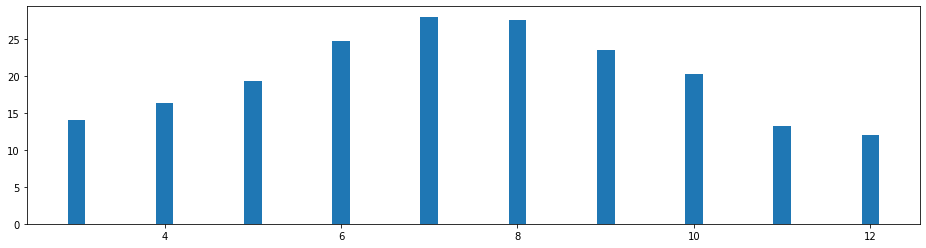

In [ ]:
# T1.1 Create a bivariate bar plot to visualise the monthly median temperature variation for the year 2004.
plt.figure(figsize = (16,4))
plt.bar(x = np.arange(3,13),height = group_2004_month.median()['T'], width = 0.2)
plt.show()

As you can see, the month values are plotted on the $x$-axis and the median temperature values for a month on the $y$-axis.

All the bars are aligned about the center or midpoint of the bottom edge of the bars.

The $x$-coordinate of the midpoint of the bottom edge of the

- $1^{\text{st}}$ bar is $3$
- $2^{\text{nd}}$ bar is $4$
- $3^{\text{rd}}$ bar is $5$

  $\vdots$

- $12^{\text{th}}$ bar is $12$

We can place the bars on the $x$-axis starting from $x = 0$.

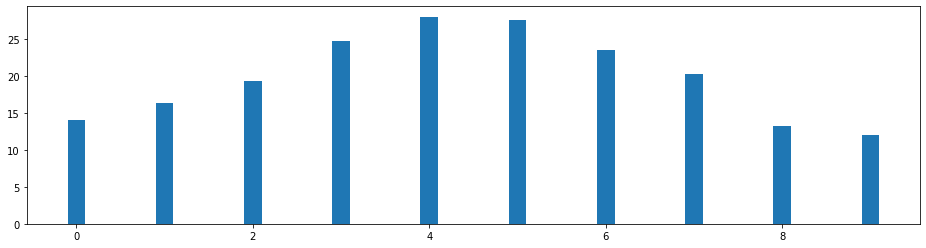

In [ ]:
# T1.2 Create a bivariate bar plot to visualise the monthly median temperature variation for the year 2004. Start with the x-coordinate equal to 0.
plt.figure(figsize = (16,4))
plt.bar(x = np.arange(10),height = group_2004_month.median()['T'], width = 0.2)
plt.show()

Let's customise the above plot by replacing the numeric month values with the actual month names, providing title to the plot and labelling the $y$-axis.

In [ ]:
# S1.1: Customise the above bar plot as per your liking.
name_2004 = aq_2004_df['DateTime'].dt.month_name().unique()
name_2004

name_2005 = aq_2005_df['DateTime'].dt.month_name().unique()

name_2004_2005 = list(name_2005) + list(name_2004[2:])
name_2004_2005

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

Similarly, you can create month wise bar plots for all the air pollutants, temperature, relative and absolute humidity in the DataFrame for the year 2005.

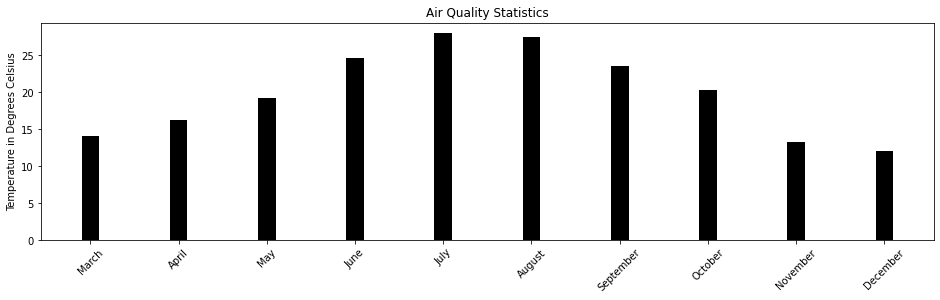

In [ ]:
# S1.2 Create month wise bar plots for all the air pollutants, temperature, relative & absolute humidity in the DataFrame for the year 2005.
plt.figure(figsize = (16,4))
plt.style.use('grayscale')
plt.title("Air Quality Statistics")
plt.bar(x = np.arange(10),height = group_2004_month.median()['T'], width = 0.2)
plt.xticks(ticks = np.arange(10), labels = name_2004, rotation = 45)
plt.ylabel("Temperature in Degrees Celsius")
plt.show()

Let's create a bar plot for both the DataFrames to compare the monthly median temperature variation in 2004 and 2005. Make sure you enable legends to differentiate between the bars for 2004 and 2005.

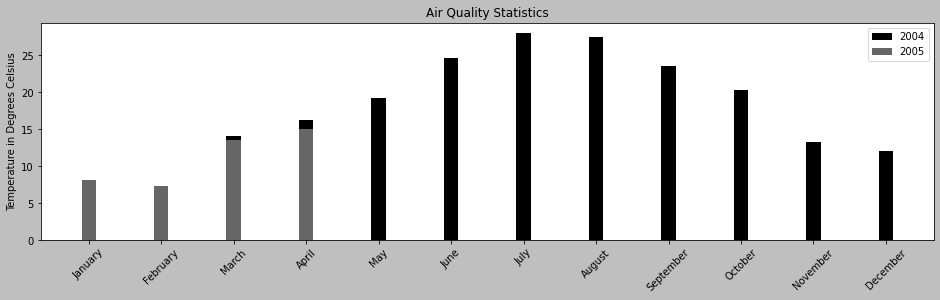

In [ ]:
# S1.3: Create a bar plot for both the DataFrames to compare the monthly median temperature variation in 2004 and 2005.
plt.figure(figsize = (16,4))
plt.style.use('grayscale')
plt.title("Air Quality Statistics")
plt.bar(x = np.arange(3,13),height = group_2004_month.median()['T'], width = 0.2, label = "2004")
plt.bar(x = np.arange(1,5),height = group_2005_month.median()['T'], width = 0.2, label = "2005")
plt.xticks(ticks = np.arange(1,13), labels = name_2004_2005, rotation = 45)
plt.ylabel("Temperature in Degrees Celsius")
plt.legend()
plt.show()

As you can see the bars are in different colours but they overlap (or superimpose). Let's plot the bars side-by-side (or adjacent) to each other for each month.

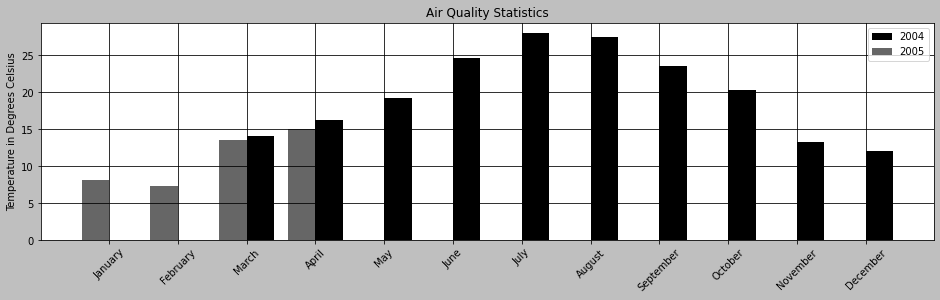

In [ ]:
# T1.3: Create a bar plot for both the DataFrames to compare the monthly median temperature variation in 2004 and 2005
# such that bars for a month for two different years are adjacent to each other.
bar_width = 0.4

plt.figure(figsize = (16,4))
plt.style.use('grayscale')
plt.title("Air Quality Statistics")
plt.bar(x = np.arange(3,13) + bar_width / 2,height = group_2004_month.median()['T'], width = bar_width, label = "2004")
plt.bar(x = np.arange(1,5) - bar_width / 2,height = group_2005_month.median()['T'], width = bar_width, label = "2005")
plt.xticks(ticks = np.arange(1,13), labels = name_2004_2005, rotation = 45)
plt.ylabel("Temperature in Degrees Celsius")
plt.legend()
plt.grid()
plt.show()

The process of aligning the bars adjacently in the same bar chart for a same variable (or feature) but different values is called shifting of bars.

---

#### Activity 2: Horizontal Bivariate Bar Plots^^^

So far we have learnt how to create bar plots in the vertical orientation. We can create the exact same bar plots in the horizontal orientation as well using the `barh()` function. You just have to replace the $x$-coordinates with the $y$-coordinates, replace `xticks` with `yticks` and interchange the values of the `height` and `width` parameters.


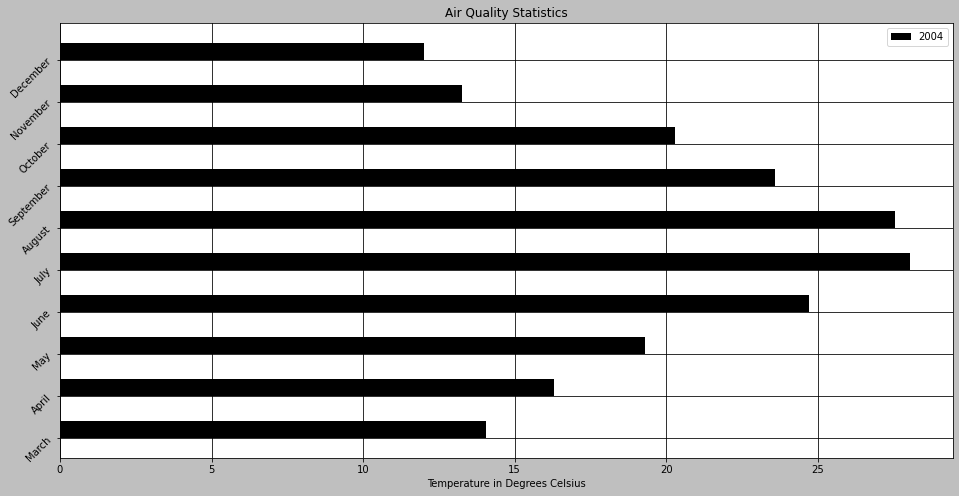

In [ ]:
# S2.1 Create a horizontal bar plot to visualise the monthly median temperature variation in 2004.
plt.figure(figsize = (16,8))
plt.style.use('grayscale')
plt.title("Air Quality Statistics")
plt.barh(y = np.arange(3,13) + bar_width / 2,width = group_2004_month.median()['T'], height = bar_width, label = "2004")
plt.yticks(ticks = np.arange(3,13), labels = name_2004, rotation = 45)
plt.xlabel("Temperature in Degrees Celsius")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# S2.2: Create a horizontal bar plot for both the DataFrames to compare the monthly median temperature variation in 2004 and 2005
# such that bars for a month for two different years are adjacent to each other.
plt.figure(figsize = (16,8))
plt.style.use('grayscale')
plt.title("Air Quality Statistics")
plt.barh(y = np.arange(3,13) + bar_width / 2,width = group_2004_month.median()['T'], height = bar_width, label = "2004")
plt.barh(y = np.arange(1,5) - bar_width / 2,width = group_2005_month.median()['T'], height = bar_width, label = "2005")
plt.yticks(ticks = np.arange(1,13), labels = name_2004_2005, rotation = 45)
plt.xlabel("Temperature in Degrees Celsius")
plt.legend()
plt.grid()
plt.show()

---

#### Activity 3: Bar Plots Using `seaborn` Module^

In addition to using the `bar` function of the `matplotlib` module, you can use the `barplot()` function of the `seaborn` module as well to create a bar plot.

The bars in the `seaborn` bar plots have fixed indices. The position of each bar begins from `index = 0` such that the midpoint of the bottom edge of a bar lies at the index value on the $x$-axis.

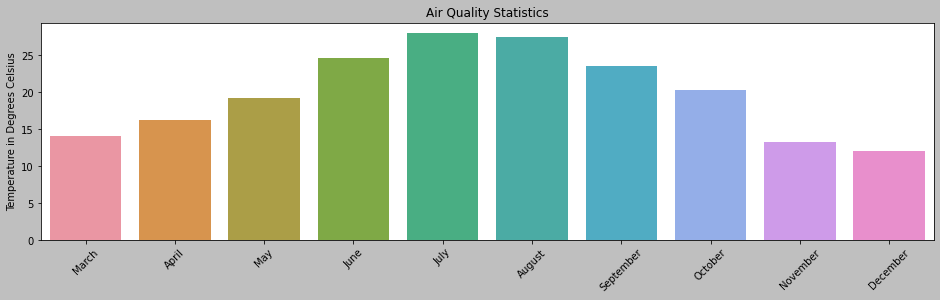

In [ ]:
# T3.1 Create a bar plot to visualise monthly median temperature variation in 2004 using the 'barplot()' function.
plt.figure(figsize = (16,4))
plt.style.use('grayscale')
plt.title("Air Quality Statistics")
sns.barplot(x = np.arange(10), y = group_2004_month.median()['T'])
plt.xticks(ticks = np.arange(10), labels = name_2004, rotation = 45)
plt.ylabel("Temperature in Degrees Celsius")
plt.show()

You can mask the bar indices with other values on the $x$-axis. E.g., you can display

- the index of the first bar with $x = 3$ instead of $x = 0$

- the index of the second bar with $x = 4$ instead of $x = 1$

- the index of the second bar with $x = 5$ instead of $x = 2$

  $\vdots$

- the index of the twelfth bar with $x = 12$ instead of $x = 9$

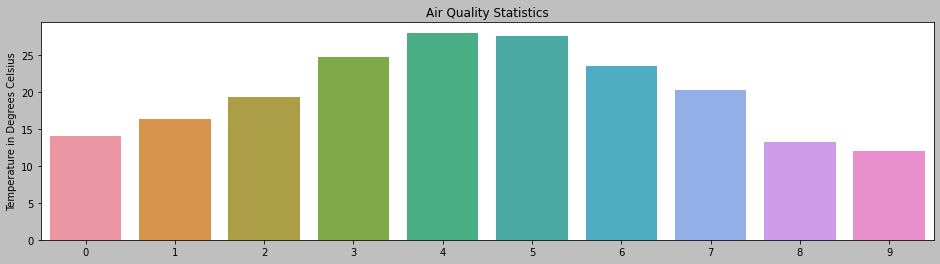

In [ ]:
# S3.1: Replace the bar indices in the above chart with the values starting from x = 3.
plt.figure(figsize = (16,4))
plt.style.use('grayscale')
plt.title("Air Quality Statistics")
sns.barplot(x = np.arange(10), y = group_2004_month.median()['T'])
#plt.xticks(ticks = np.arange(10), labels = name_2004, rotation = 45)
plt.ylabel("Temperature in Degrees Celsius")
plt.show()

We can directly mask the indices of the bar plots with the actual month names.

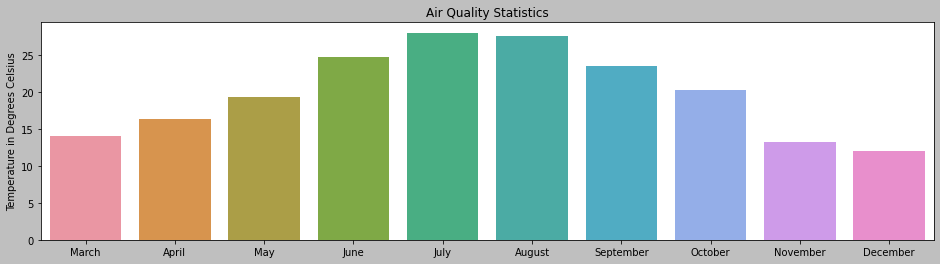

In [ ]:
# S3.2: Replace the bar indices in the above chart with the actual month names
plt.figure(figsize = (16,4))
plt.style.use('grayscale')
plt.title("Air Quality Statistics")
sns.barplot(x = name_2004, y = group_2004_month.median()['T'])
#plt.xticks(ticks = np.arange(10), labels = name_2004, rotation = 45)
plt.ylabel("Temperature in Degrees Celsius")
plt.show()

We can create bar plots using the `barplot()` function for a DataFrame without applying the grouping and aggregation functions. We just have to ensure that

- the input value to the `x` parameter should be the series (or column) that needs to be plotted on the $x$-axis.

- the input value to the `y` parameter should be the series (or column) that needs to be plotted on the $y$-axis.

- the input value to the `data` parameter should be the DataFrame containing the above two series (or columns) that need to be plotted on the coordinate axes.


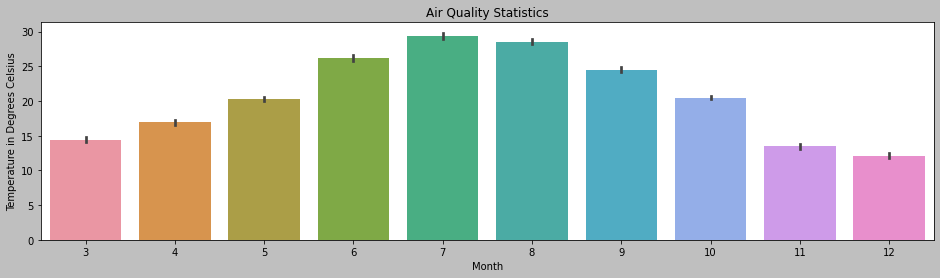

In [ ]:
# S3.3: Without applying the grouping & aggregation operations, create a bar plot to visualise monthly mean temperature variation in 2004.
plt.figure(figsize = (16,4))
plt.style.use('grayscale')
plt.title("Air Quality Statistics")
sns.barplot(x = 'Month', y ='T', data = df[df['Year'] == 2004])
#plt.xticks(ticks = np.arange(10), labels = name_2004, rotation = 45)
plt.ylabel("Temperature in Degrees Celsius")
plt.show()

The `barplot()` function of the `seaborn` module by default plots the mean values. If you want to plot the median value then pass the `median` attribute to the `estimator` parameter inside the `barplot()` function. To use the `median` attribute, you have to first import it from the `numpy` module.

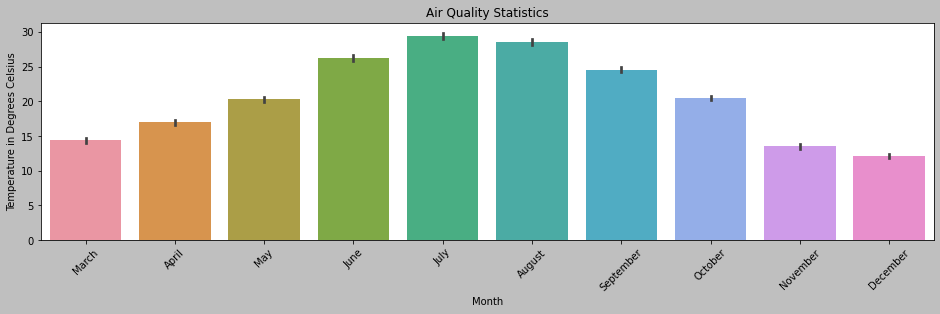

In [ ]:
# S3.4: Replace the bar indices in the above chart with the actual month names.
plt.figure(figsize = (16,4))
plt.style.use('grayscale')
plt.title("Air Quality Statistics")
sns.barplot(x = 'Month', y ='T', data = df[df['Year'] == 2004])
plt.xticks(ticks = np.arange(10), labels = name_2004, rotation = 45)
plt.ylabel("Temperature in Degrees Celsius")
plt.show()

We can also split the bars about the year values (in general any categorical value) by passing the `Year` column as a value to the `hue` parameter.

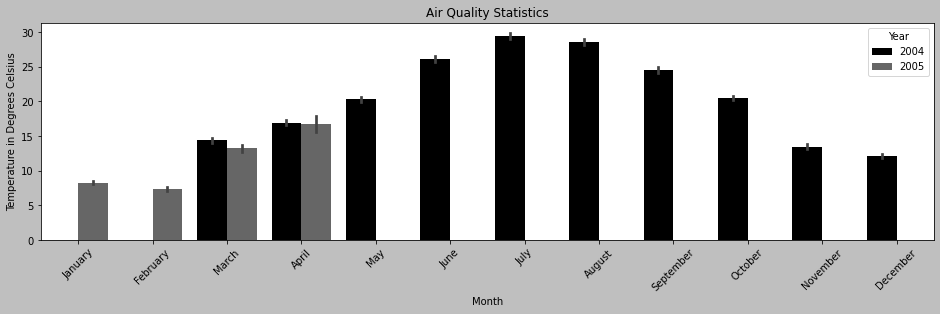

In [ ]:
# S3.5: Create a bar plot to compare the monthly median temperature variation in 2004 and 2005
# such that the bars for a month for two different years are adjacent to each other.
plt.figure(figsize = (16,4))
plt.style.use('grayscale')
plt.title("Air Quality Statistics")
sns.barplot(x = 'Month',hue = 'Year', y ='T', data = df)
plt.xticks(ticks = np.arange(12), labels = name_2004_2005, rotation = 45)
plt.ylabel("Temperature in Degrees Celsius")
plt.show()

One of the great advantages of the `seaborn` functions is that you don't have to specify the `label` parameter to create the legends to distinguish between the plots for different values. The `seaborn` module functions automatically create them. However, while the `seaborn` plots provide convenience, the `matplotlib` plots provide more control. The `seaborn` plots offer plots specifically for the field of statistics whereas the `matplotlib` plot offers plots for wider domains. Remember that the `seaborn` plots behind the scenes are actually pre-configured `matplotlib` plots.


**The Horizontal Bar Plot**

You can also create a horizontal bar plot using the `barplot()` function. You just need to plot the categorical (or discrete numeric values & string) values on the $y$-axis and pass the `h` attribute as an input to the `orient` parameter.

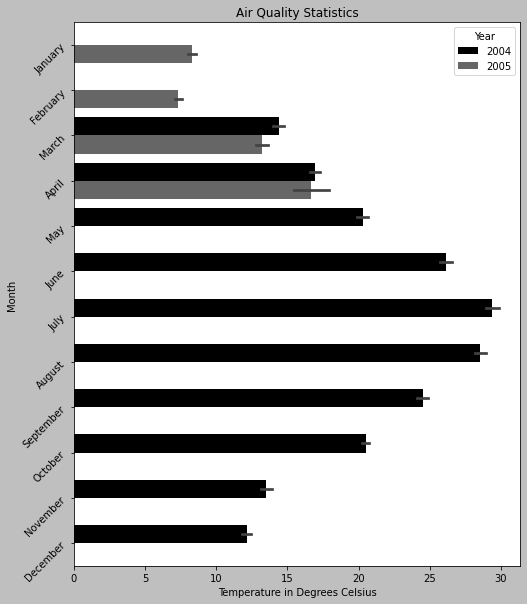

In [ ]:
# T3.2: Create a horizontal bar plot bar to visualise the monthly median temperature variation in 2004 and 2005 in the same chart.
plt.figure(figsize = (8,10))
plt.style.use('grayscale')
plt.title("Air Quality Statistics")
sns.barplot(y = 'Month',hue = 'Year', x ='T',orient = 'h', data = df)
plt.yticks(ticks = np.arange(12), labels = name_2004_2005, rotation = 45)
plt.xlabel("Temperature in Degrees Celsius")
plt.show()

**Conversion Into Categorical Values**

If you have a Pandas series containing discrete numeric values, i.e., (1, 2, 3 ...) then you can convert them into categorical values by using the `astype` function and passing `'category'` as an input to the function.

In [ ]:
# T3.3: Convert the 'Month' values in the 'df' DataFrame into categorical values.
df['Month']

dtype('int64')

In [ ]:
df['Month'] = df['Month'].astype('category')

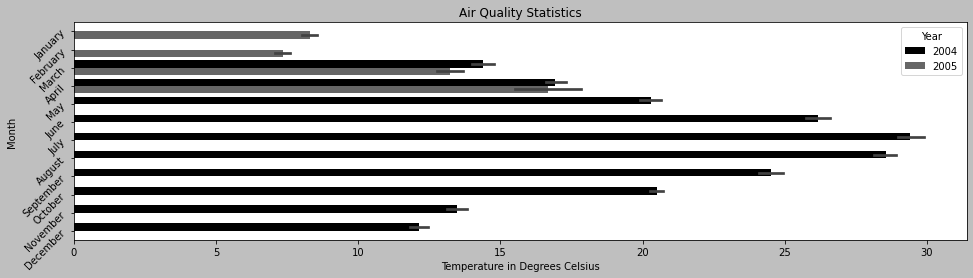

In [ ]:
# T3.4: Create the above bar plot without using the 'orient' parameter.
plt.figure(figsize = (16,4))
plt.style.use('grayscale')
plt.title("Air Quality Statistics")
sns.barplot(x = 'T',hue = 'Year', y ='Month', data = df)
plt.yticks(ticks = np.arange(12), labels = name_2004_2005, rotation = 45)
plt.xlabel("Temperature in Degrees Celsius")
plt.show()

That's it. We have covered the most important aspects of the bar plots in this class. In the next class, we will learn correlation.

**Note:** You may now attempt **Project 12**.

---